<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


**Code above provided, but Python gave warning that dataset to be deprecated soon**
* Used suggestion by warning to import dataset via a different method
* Manually dictate the column names

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
medv = target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [4]:
medv = pd.DataFrame(target, columns=['MEDV'])

In [5]:
df1 = pd.merge(left=df,
        right=medv,
        how='outer',
        left_index=True, 
        right_index=True)

df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


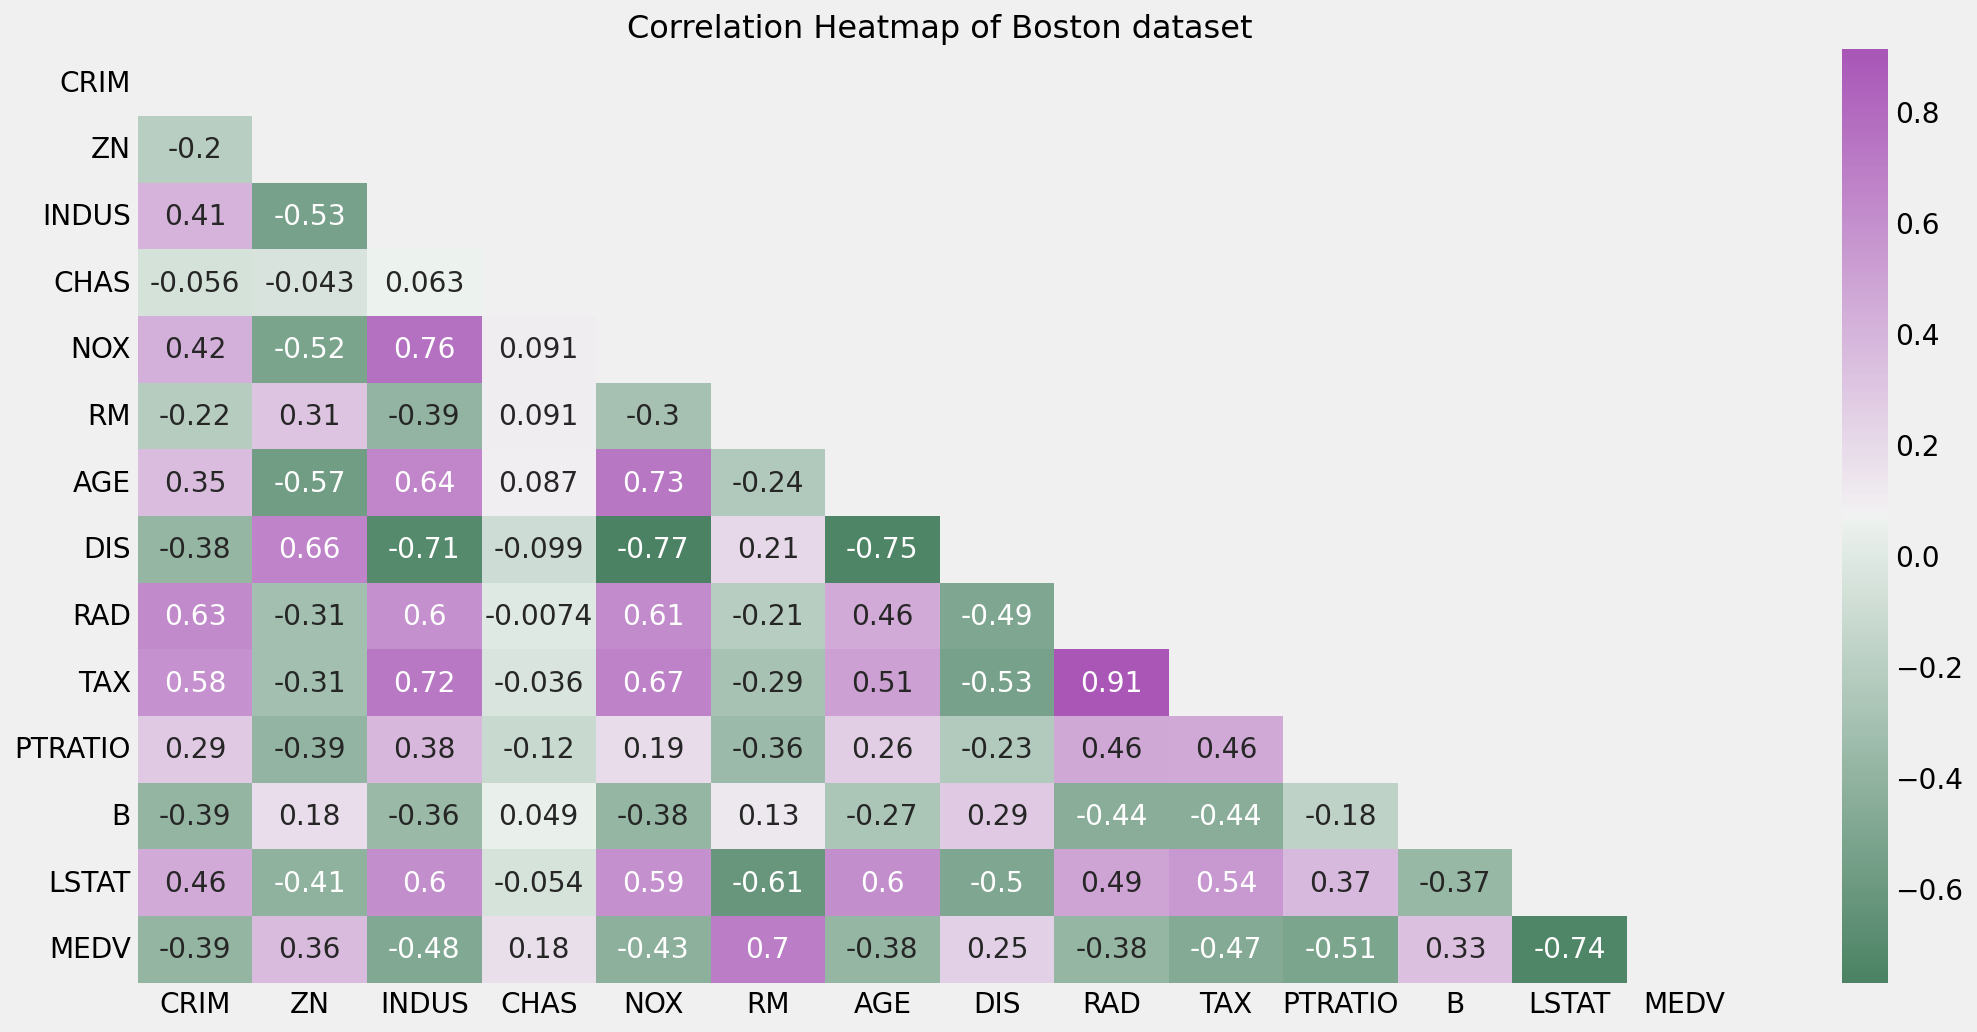

In [9]:
plt.figure(figsize = (16,8))

# Get correlation of variables.
corr = df1.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True), mask=mask, annot=True)
plt.title('Correlation Heatmap of Boston dataset', fontsize=16);

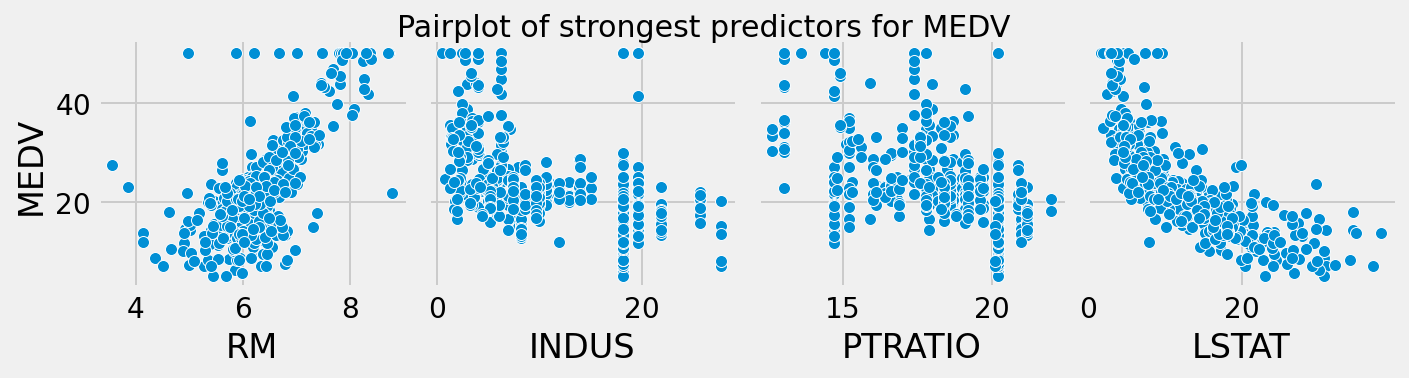

In [10]:
sns.pairplot(df1, x_vars=['RM','INDUS','PTRATIO','LSTAT'], y_vars=['MEDV'])
plt.suptitle('Pairplot of strongest predictors for MEDV', y=1.03, fontsize=15);

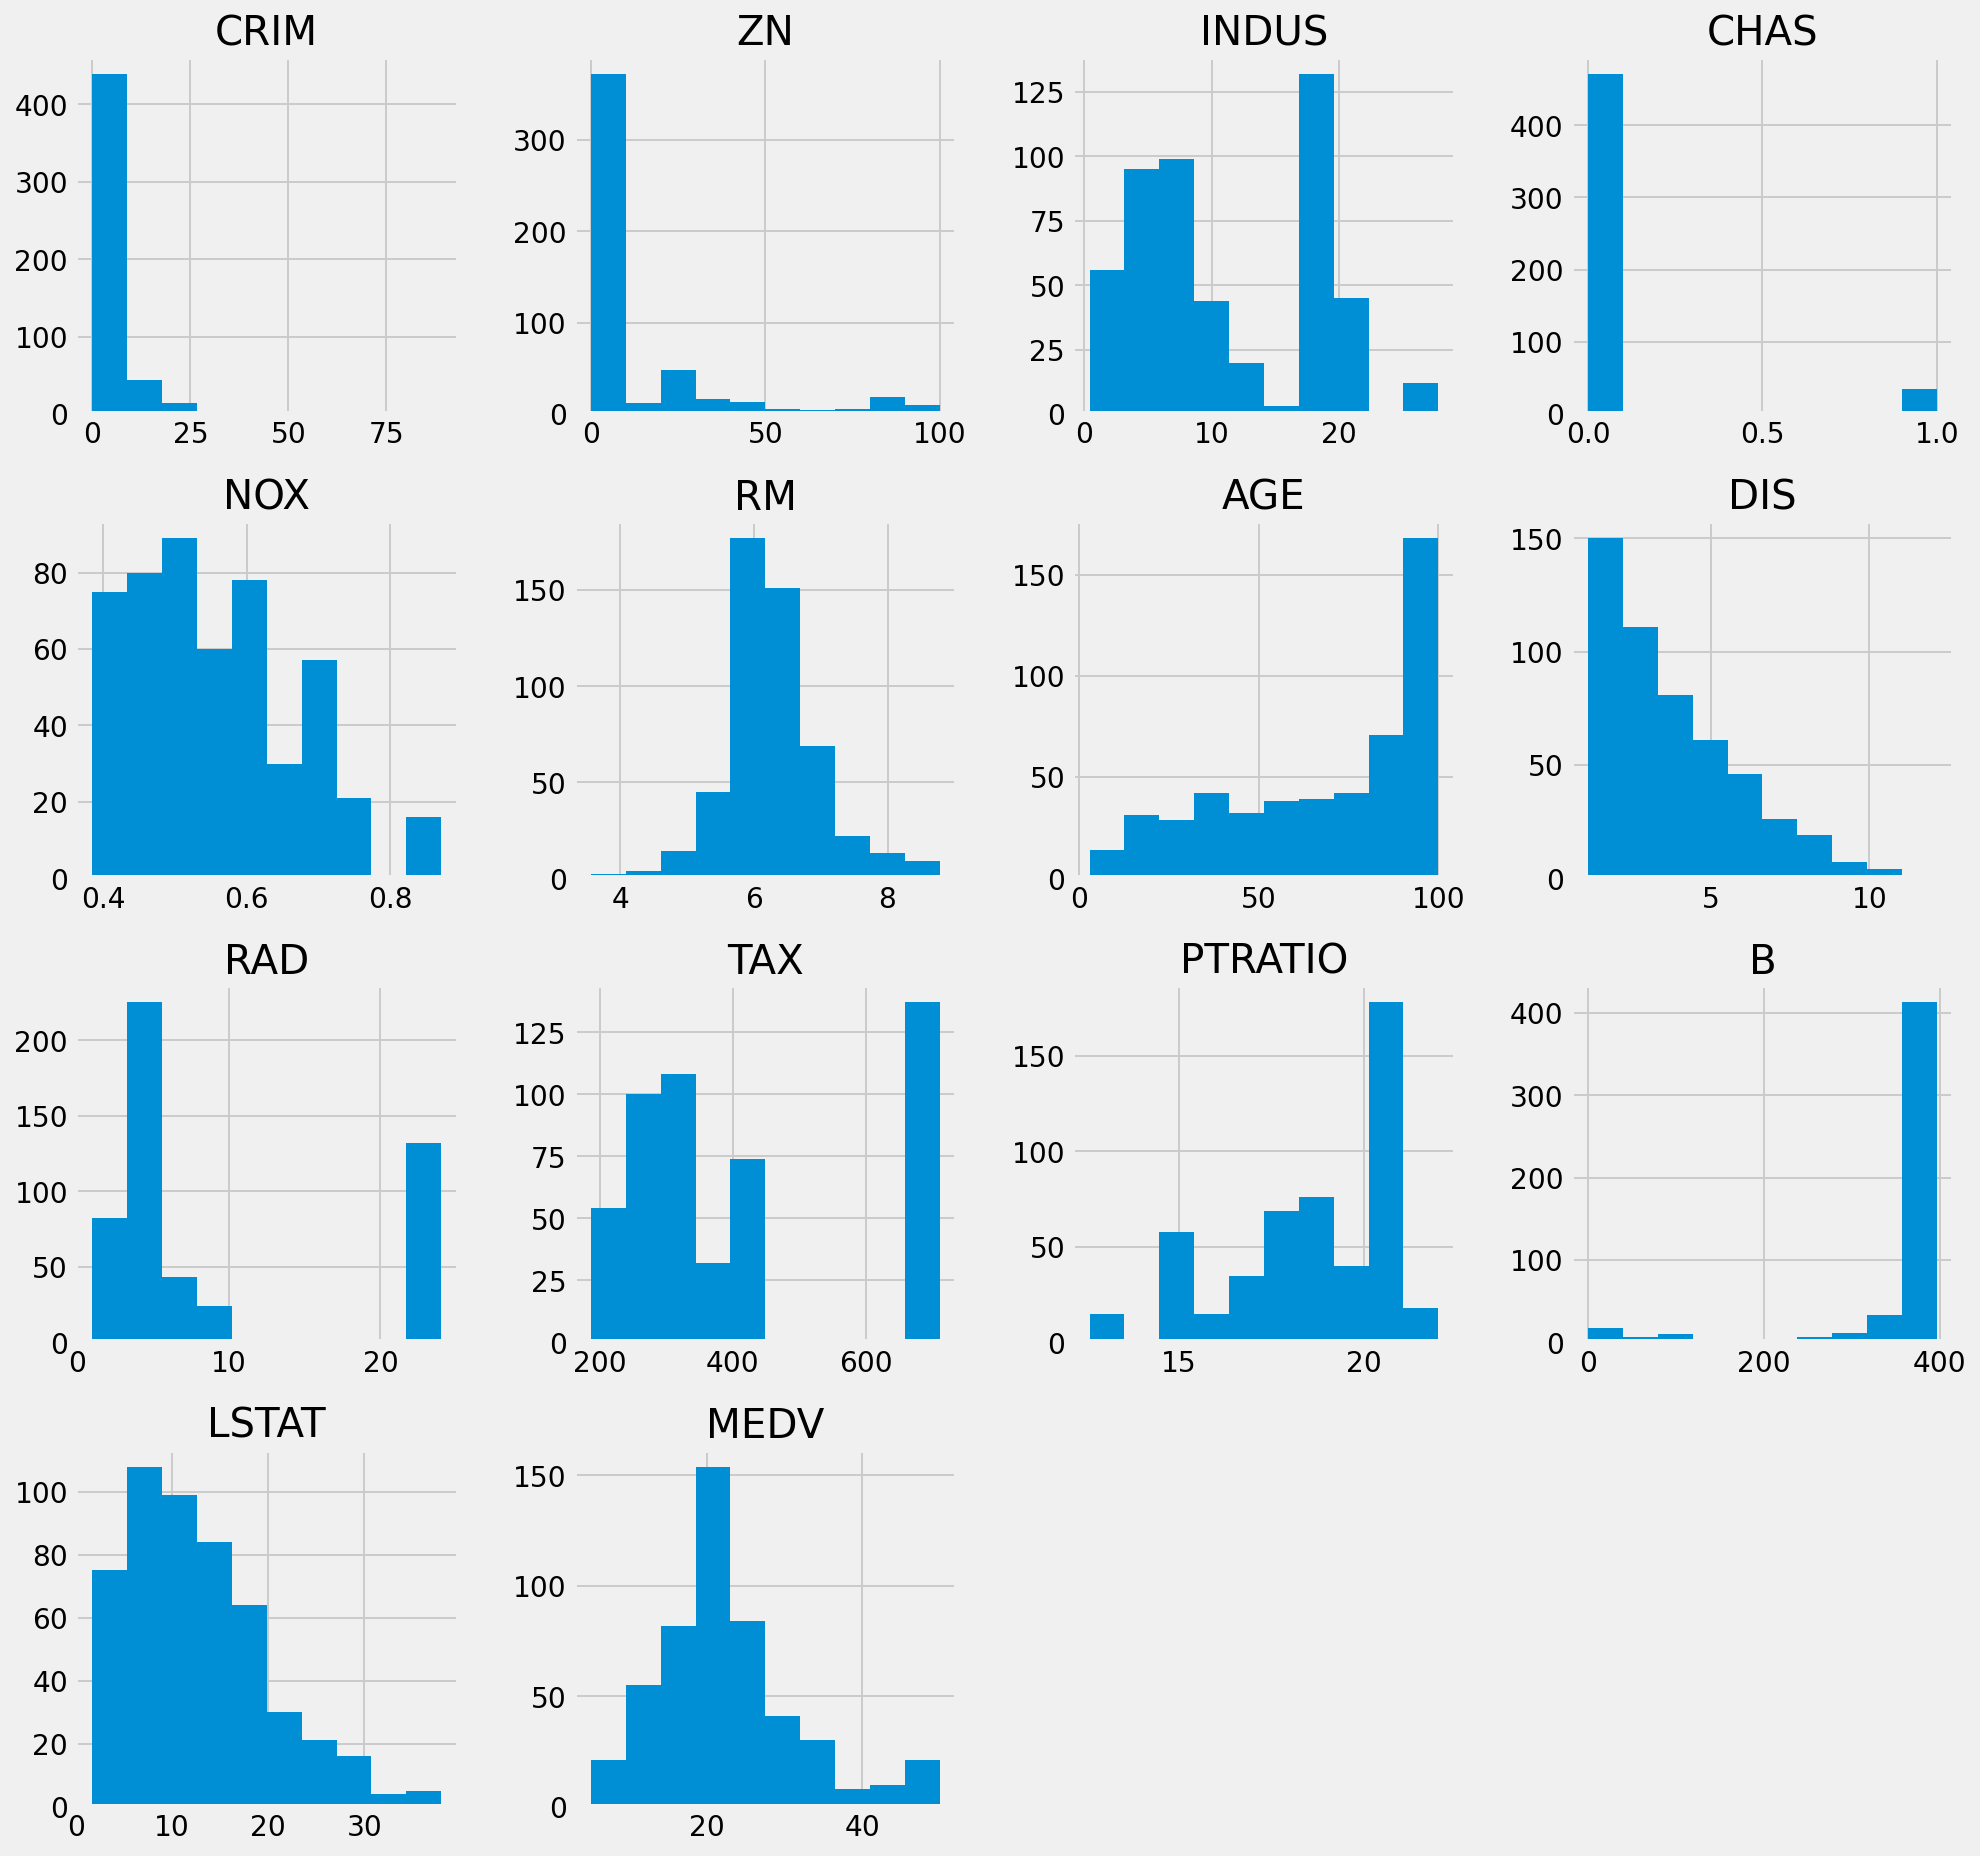

In [11]:
df1.hist(figsize=(15,15));

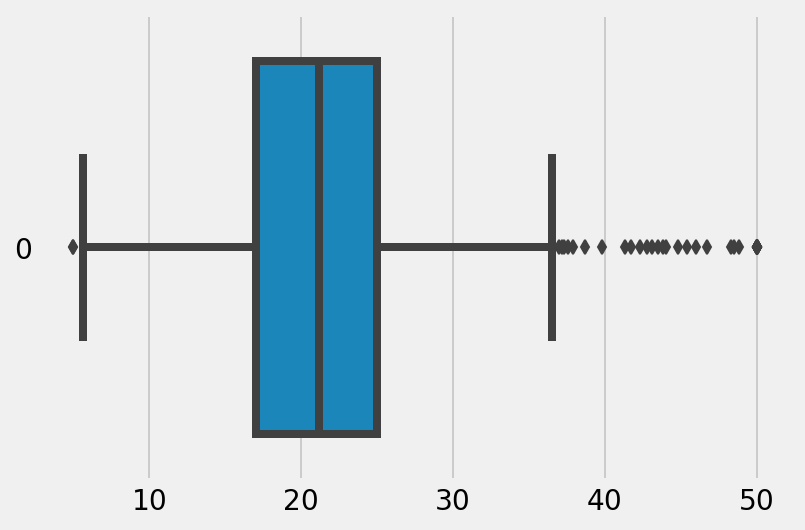

In [12]:
sns.boxplot(data=df1['MEDV'], orient='h');

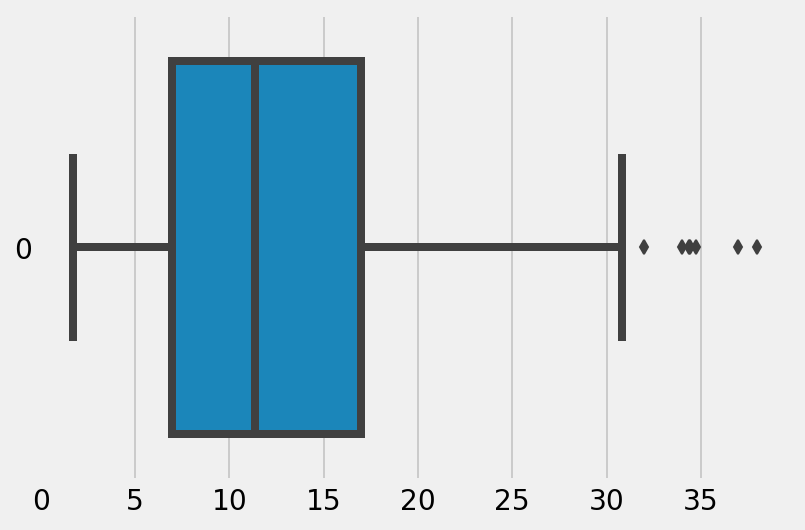

In [13]:
sns.boxplot(data=df1['LSTAT'], orient='h');

### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

**The following variables are selected for predicting `target` (median value of owner-occupied homes)** 

* `RM`, `PTRATIO`, `INDUS`, `LSTAT`

## Linear Regression model
---

In [14]:
features = ['RM','PTRATIO','INDUS','LSTAT']
X = df1[features]
y = df1['MEDV']

In [15]:
print(X.shape, y.shape)

(506, 4) (506,)


**_Train, test, split, random_state=32_**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=32)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(253, 4) (253, 4) (253,) (253,)


**_Scale values_**

In [18]:
ss = MinMaxScaler()
ss.fit(X_train)
Z_train = ss.transform(X_train)
Z_test = ss.transform(X_test)

**_Instantiate and fit model_**

In [19]:
lr = LinearRegression()
lr.fit(Z_train, y_train)

LinearRegression()

**_Make predictions_**

In [20]:
y_train_pred = lr.predict(Z_train)
y_test_pred = lr.predict(Z_test)

**_Evaluate model_**

In [21]:
print(f'train_r2: {r2_score(y_train, y_train_pred)}')
print(f'test_r2: {r2_score(y_test, y_test_pred)}')

train_r2: 0.7176097771486567
test_r2: 0.6282204812200163


In [22]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'train_mse: {train_mse}')
print(f'test_mse: {test_mse}')

train_mse: 24.85114625105235
test_mse: 29.70358221924966


In [23]:
# percentage difference in error for performance on train vs test data
mse_perc_diff = abs((train_mse - test_mse)/ train_mse)*100
print(mse_perc_diff,'%')

19.526004632449624 %


**_Visualise possible model configurations using Seaborn Implot_**

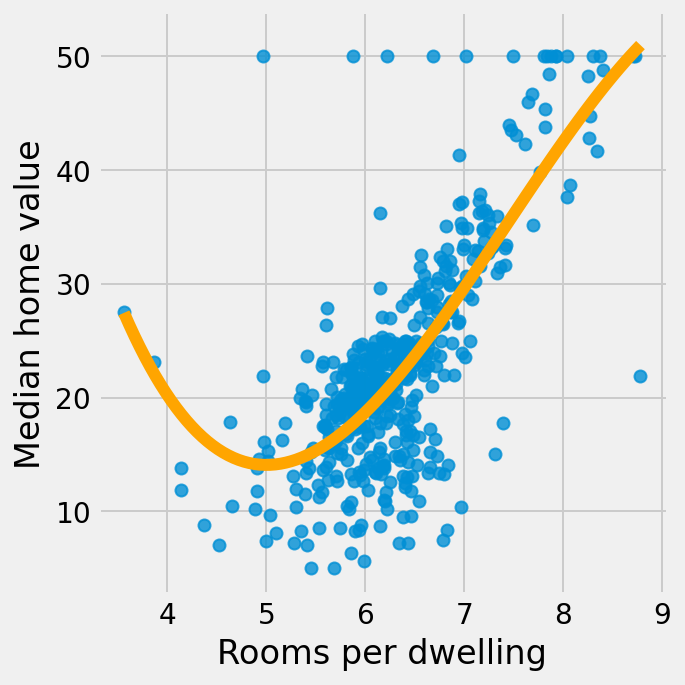

In [24]:
sns.lmplot(x = 'RM', y = 'MEDV',
          data = df1, ci = False, fit_reg = True, line_kws={'color': 'orange'}, order=3).set_axis_labels('Rooms per dwelling', 'Median home value');

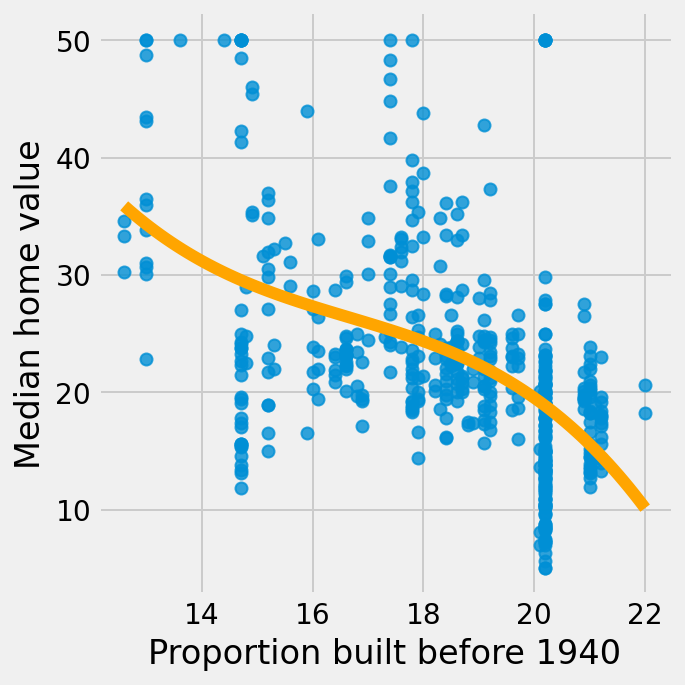

In [25]:
sns.lmplot(x = 'PTRATIO', y = 'MEDV',
          data = df1, ci = False, fit_reg = True, line_kws={'color': 'orange'}, order=3).set_axis_labels('Proportion built before 1940', 'Median home value');

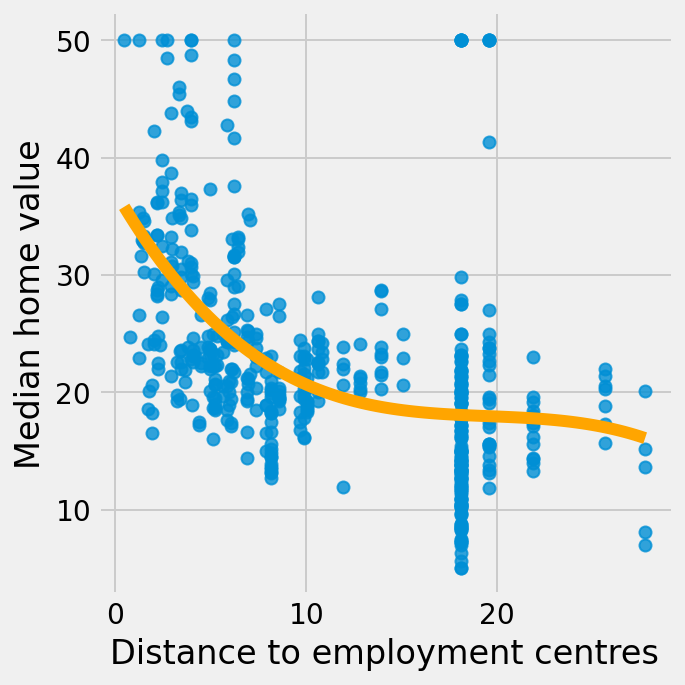

In [26]:
sns.lmplot(x = 'INDUS', y = 'MEDV',
          data = df1, ci = False, fit_reg = True, line_kws={'color': 'orange'}, order=3).set_axis_labels('Distance to employment centres','Median home value');

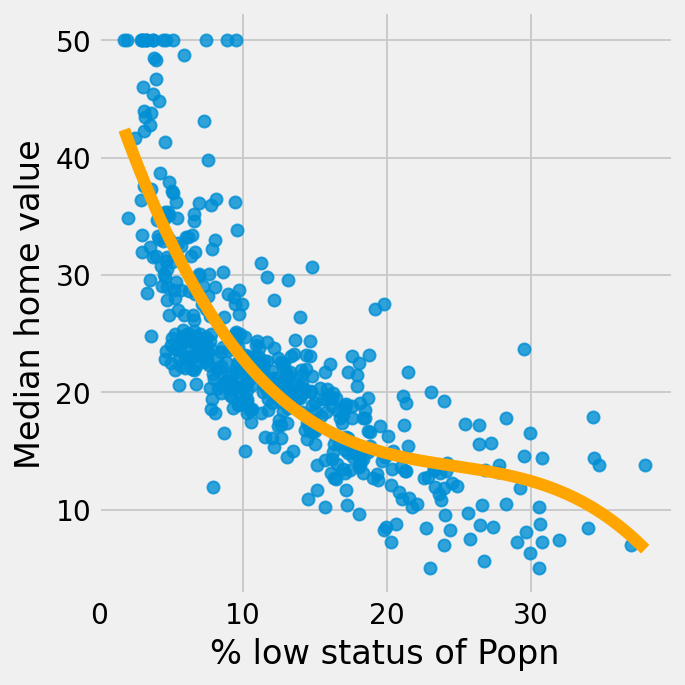

In [27]:
sns.lmplot(x = 'LSTAT', y = 'MEDV',
          data = df1, ci = False, fit_reg = True, line_kws={'color': 'orange'}, order=3).set_axis_labels('% low status of Popn','Median home value');

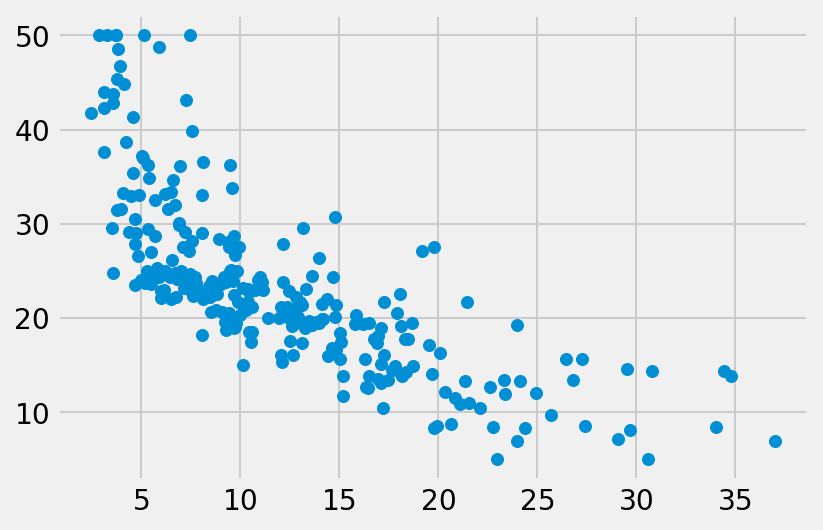

In [28]:
plt.scatter(X_train['LSTAT'], y_train);
# not linear relationship

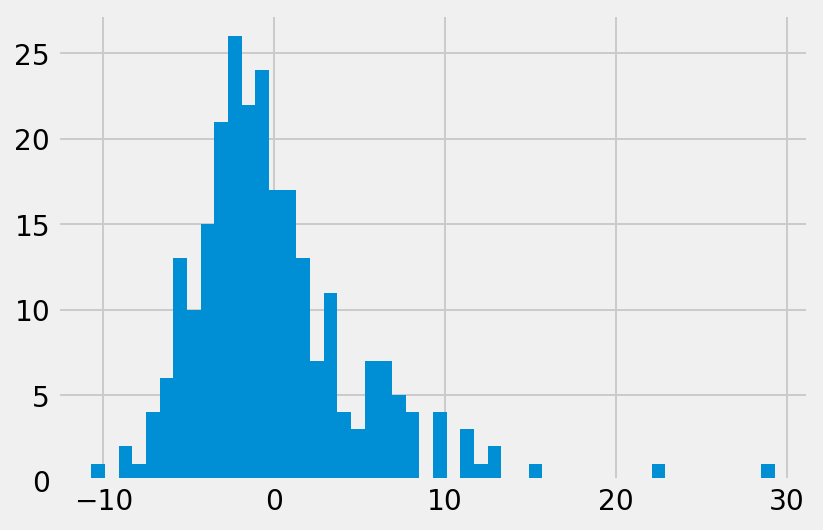

In [29]:
resids_train = y_train-y_train_pred
plt.hist(resids_train, bins=50);
# not normally distributed errors

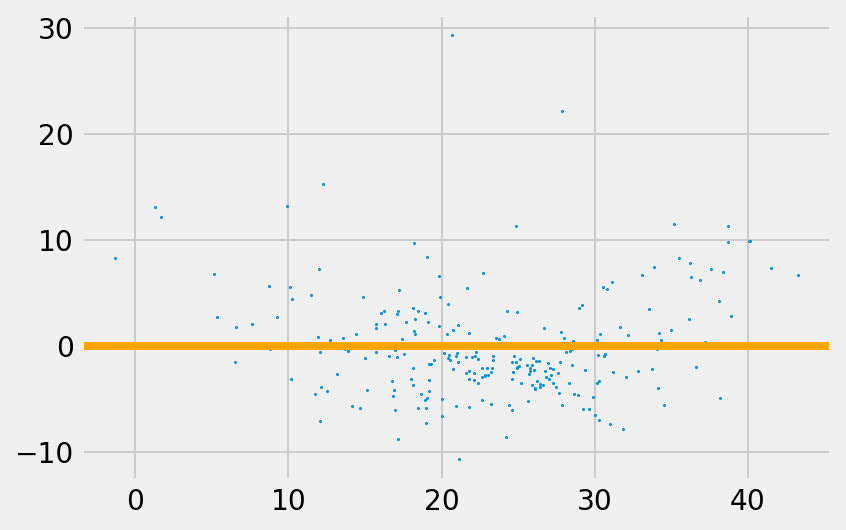

In [30]:
plt.scatter(y_train_pred,resids_train, s=1)
plt.axhline(0, color='orange');
# unequal variance of errors

In [31]:
# Multi-collinearity
X_train.corr()

,RM,PTRATIO,INDUS,LSTAT
RM,1.000000,-0.410511,-0.461031,-0.590222
PTRATIO,-0.410511,1.000000,0.402455,0.404896
INDUS,-0.461031,0.402455,1.000000,0.618910
LSTAT,-0.590222,0.404896,0.618910,1.000000


### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

### Attempt 70-30 split
---

In [32]:
features = ['RM','INDUS','PTRATIO','LSTAT']
X = df1[features]
y = df1['MEDV']

In [33]:
print(X.shape, y.shape)

(506, 4) (506,)


**_Train, test, split, random_state=42_**

In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(354, 4) (152, 4) (354,) (152,)


**_Scale values_**

In [36]:
ss = MinMaxScaler()
ss.fit(X1_train)
Z1_train = ss.transform(X1_train)
Z1_test = ss.transform(X1_test)

**_Instantiate and fit model_**

In [37]:
lr = LinearRegression()
lr.fit(Z1_train, y1_train)

LinearRegression()

**_Make predictions_**

In [38]:
y1_train_pred = lr.predict(Z1_train)
y1_test_pred = lr.predict(Z1_test)

**_Evaluate model_**

In [39]:
lr.score(Z1_train, y1_train)

0.6857397450682992

In [40]:
print(f'train_r2: {r2_score(y1_train, y1_train_pred)}')
print(f'test_r2: {r2_score(y1_test, y1_test_pred)}')

train_r2: 0.6857397450682992
test_r2: 0.647134128005986


In [41]:
train1_mse = mean_squared_error(y1_train, y1_train_pred)
test1_mse = mean_squared_error(y1_test, y1_test_pred)
print(f'train_mse: {train1_mse}')
print(f'test_mse: {test1_mse}')

train_mse: 27.622385741142978
test_mse: 26.293128442528698


In [42]:
# percentage difference in error for performance on train vs test data
mse_perc_diff = abs((train1_mse - test1_mse)/ train1_mse)*100
print(mse_perc_diff,'%')

4.812246527403962 %


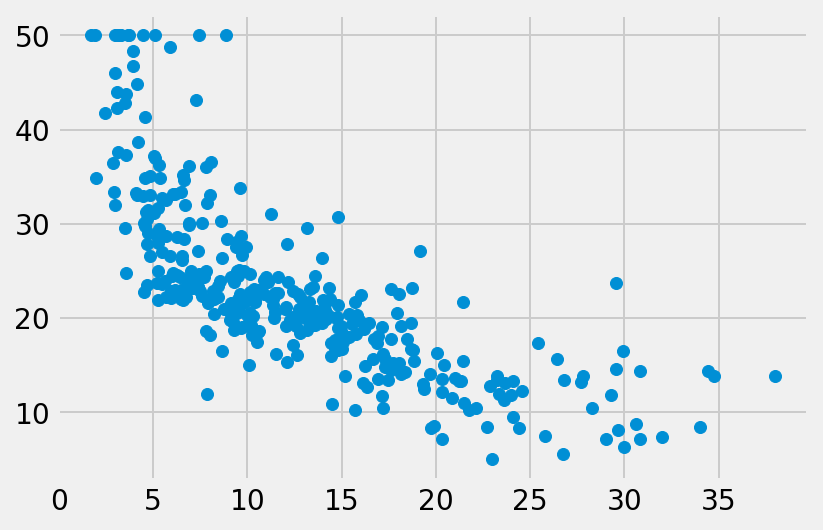

In [43]:
plt.scatter(X1_train['LSTAT'], y1_train);
# not linear relationship

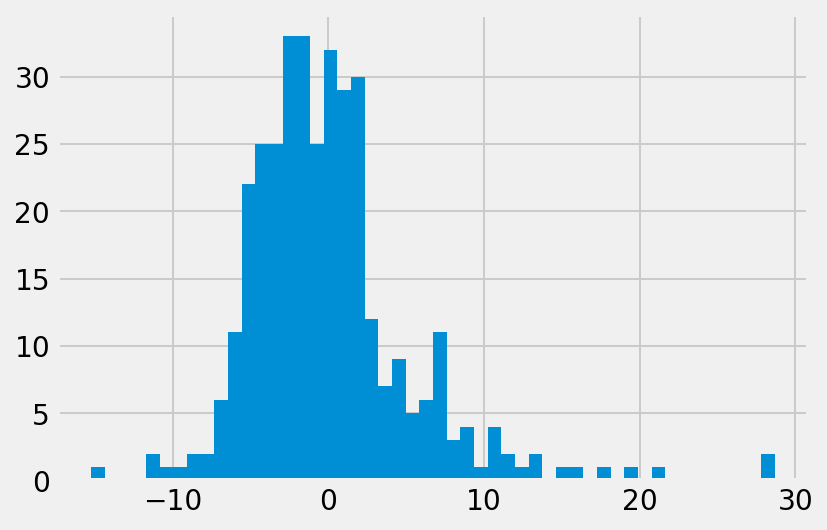

In [44]:
resids1_train = y1_train-y1_train_pred
plt.hist(resids1_train, bins=50);
# not normally distributed errors

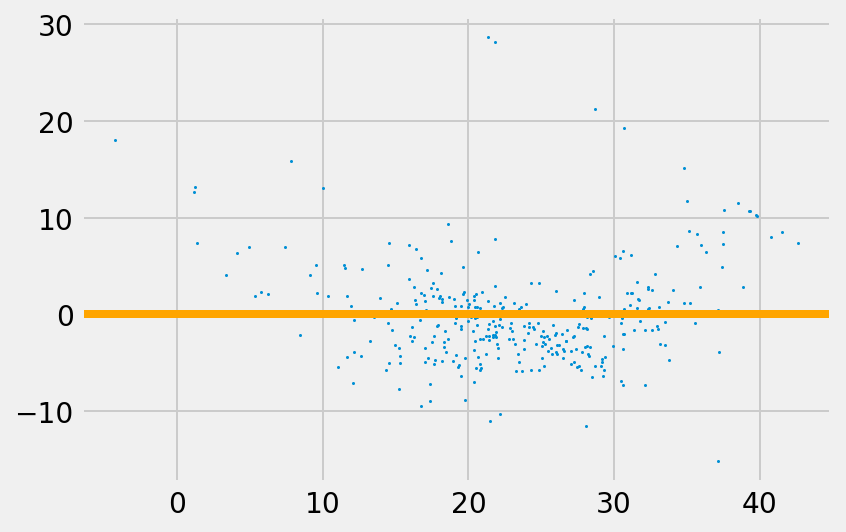

In [45]:
plt.scatter(y1_train_pred,resids1_train, s=1)
plt.axhline(0, color='orange');
# unequal variance of errors

In [46]:
# Multi-collinearity
X1_train.corr()

,RM,INDUS,PTRATIO,LSTAT
RM,1.000000,-0.407417,-0.345720,-0.618609
INDUS,-0.407417,1.000000,0.362794,0.578976
PTRATIO,-0.345720,0.362794,1.000000,0.361428
LSTAT,-0.618609,0.578976,0.361428,1.000000


### Attempt 90-10 split
---

In [47]:
features = ['RM','INDUS','PTRATIO','LSTAT']
X = df1[features]
y = df1['MEDV']

In [48]:
print(X.shape, y.shape)

(506, 4) (506,)


**_Train, test, split, random_state=52_**

In [49]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.1, random_state=52)

In [50]:
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(455, 4) (51, 4) (455,) (51,)


**_Scale values_**

In [51]:
ss = MinMaxScaler()
ss.fit(X2_train)
Z2_train = ss.transform(X2_train)
Z2_test = ss.transform(X2_test)

**_Instantiate and fit model_**

In [52]:
lr = LinearRegression()
lr.fit(Z2_train, y2_train)

LinearRegression()

**_Make predictions_**

In [53]:
y2_train_pred = lr.predict(Z2_train)
y2_test_pred = lr.predict(Z2_test)

**_Evaluate model_**

In [54]:
print(f'train_r2: {r2_score(y2_train, y2_train_pred)}')
print(f'test_r2: {r2_score(y2_test, y2_test_pred)}')

train_r2: 0.6670329584437905
test_r2: 0.7795224307737652


In [55]:
train2_mse = mean_squared_error(y2_train, y2_train_pred)
test2_mse = mean_squared_error(y2_test, y2_test_pred)
print(f'train_mse: {train2_mse}')
print(f'test_mse: {test2_mse}')

train_mse: 28.441351108246085
test_mse: 15.582174643750864


In [56]:
# percentage difference in error for performance on train vs test data
mse_perc_diff = abs((train2_mse - test2_mse)/ train2_mse)*100
print(mse_perc_diff,'%')

45.21295917185496 %


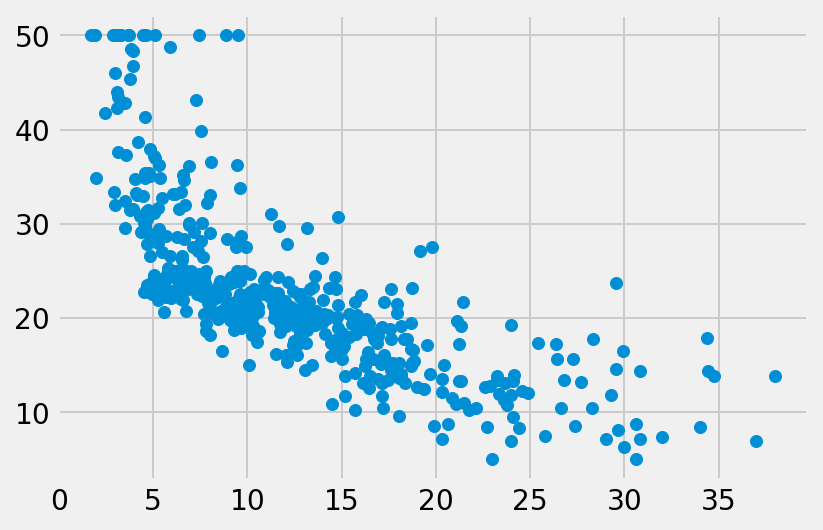

In [57]:
plt.scatter(X2_train['LSTAT'], y2_train);
# not linear relationship

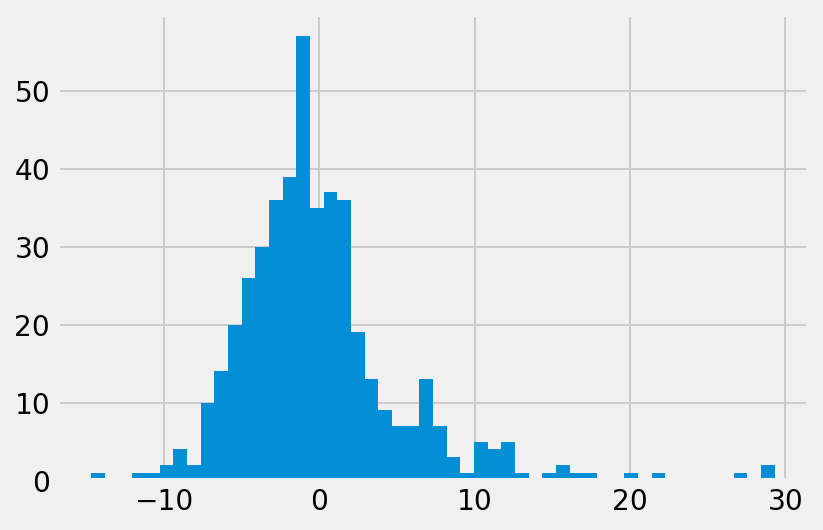

In [58]:
resids2_train = y2_train-y2_train_pred
plt.hist(resids2_train, bins=50);
# not normally distributed errors

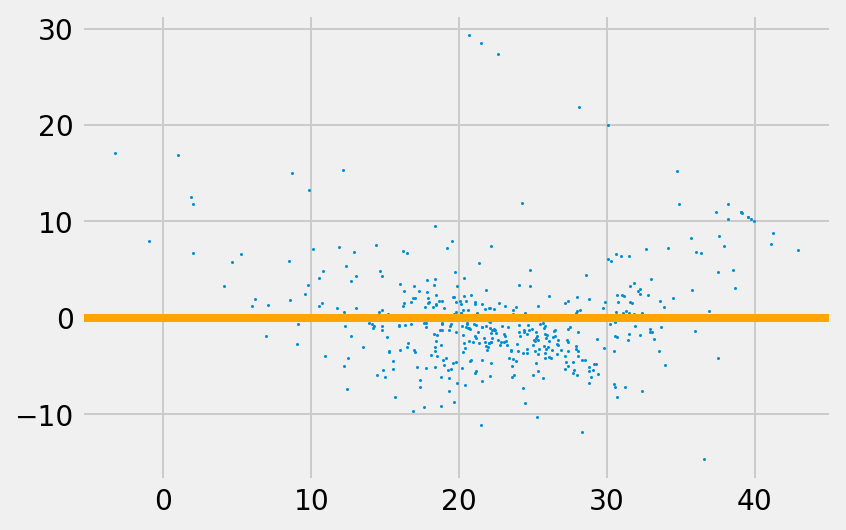

In [59]:
plt.scatter(y2_train_pred,resids2_train, s=1)
plt.axhline(0, color='orange');
# unequal variance of errors

In [60]:
# Multi-collinearity
X2_train.corr()

,RM,INDUS,PTRATIO,LSTAT
RM,1.000000,-0.376776,-0.344115,-0.600426
INDUS,-0.376776,1.000000,0.385001,0.598373
PTRATIO,-0.344115,0.385001,1.000000,0.376048
LSTAT,-0.600426,0.598373,0.376048,1.000000


**Findings:**

* With 70/30 split, model performed slightly worse on train data set than on test set. 50/50 resulted in better results with training data set, and worse on test set. 70/30 split MSE difference was minimal.
* With 90/10 split, model also performed worse on training data set, better on test set. But the MSE difference has increased significantly compared to 70/30 split. 
* 70/30 split for model training has the best mse difference between training and test set

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

In [61]:
cross_val_score(lr, X, y, cv=4).mean()

0.33436463979407227

In [62]:
cross_val_score(lr, X, y, cv=5).mean()

0.40099986238470625

In [63]:
cross_val_score(lr, X, y, cv=6).mean()

0.4478121952686629

In [64]:
cross_val_score(lr, X, y, cv=7).mean()

0.4199799747539246

In [65]:
cross_val_score(lr, X, y, cv=8).mean()

0.3170254934451741

In [66]:
cross_val_score(lr, X, y, cv=9).mean()

0.35130790527263644

In [67]:
cross_val_score(lr, X, y, cv=10).mean()

0.19298437674553842

**_Visualise the weights of the coefficients used for model_**

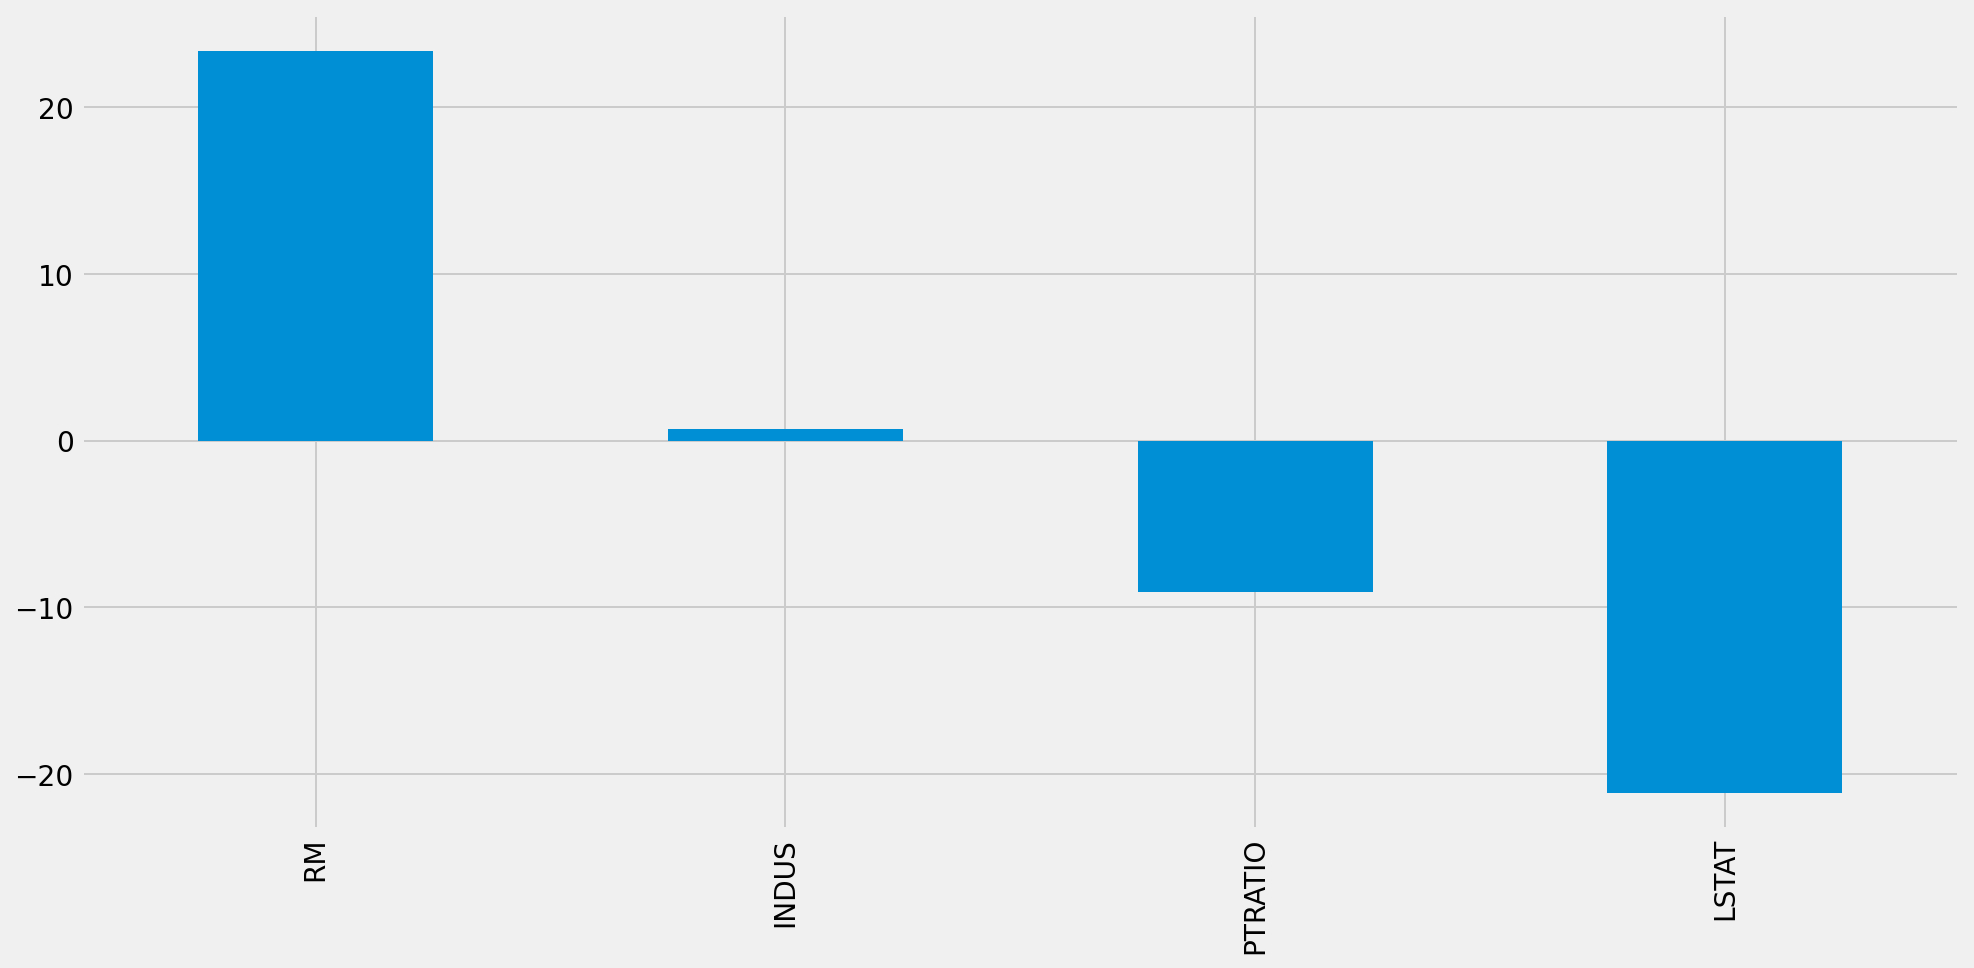

In [68]:
pd.Series(lr.coef_, index=features).plot.bar(figsize=(15,7));

**Findings:**

* The score mean increased when cv folds increased from 4 to 6, then started to decrease again when cv folds continued to increase further from 6

### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [69]:
from itertools import combinations

### Try train-test-split
---

In [75]:
def lr_model(lst):
    best_mse_diff = None
    for combi in lst:
        # define X, y
        X = df1[list(combi)]
        y = df1['MEDV']
        # re-use training set from 70-30 split
        X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.3, random_state=62)
        # scale values
        ss = MinMaxScaler()
        ss.fit(X3_train)
        Z3_train = ss.transform(X3_train)
        Z3_test = ss.transform(X3_test)
        # instantiate model
        lr = LinearRegression()
        # fit model
        lr.fit(Z3_train, y3_train)
        # make predictions
        y3_train_pred = lr.predict(Z3_train)
        y3_test_pred = lr.predict(Z3_test)
        # evaluate model
        train3_mse = mean_squared_error(y3_train, y3_train_pred)
        test3_mse = mean_squared_error(y3_test, y3_test_pred)
        if best_mse_diff == None:
            best_mse_diff = abs((train3_mse - test3_mse)/ train3_mse)*100
        # select what to print
        if best_mse_diff != None:
            if (abs((train3_mse - test3_mse)/ train3_mse)*100) < best_mse_diff:
                best_mse_diff = (abs((train3_mse - test3_mse)/ train3_mse)*100)
    print(X.columns.tolist())
    print(X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape)
    print(f'X-shape: {X.shape}, y-shape: {y.shape}')
    print(f'train_mse: {train3_mse}, test_mse: {test3_mse}')
    print(f'perceived mse difference: {best_mse_diff} %')

In [76]:
lst = list(combinations(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], 4))
lr_model(lst)

['TAX', 'PTRATIO', 'B', 'LSTAT']
(354, 4) (152, 4) (354,) (152,)
X-shape: (506, 4), y-shape: (506,)
train_mse: 32.09200555748373, test_mse: 34.88637073487877
perceived mse difference: 0.0010769243191025729 %


In [77]:
lst = list(combinations(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], 3))
lr_model(lst)

['PTRATIO', 'B', 'LSTAT']
(354, 3) (152, 3) (354,) (152,)
X-shape: (506, 3), y-shape: (506,)
train_mse: 32.19302477550589, test_mse: 34.73435316443698
perceived mse difference: 0.044781717292451687 %


---
### Findings:
---
* Best model for linear regression uses columns `TAX`, `PTRATIO`, `B` and `LSTAT` for predictions
    * It has a `train_mse score`: 32.09200555748373 and `test_mse score`: 34.88637073487877
    * And a perceived `mse difference` of 0.0010769243191025729 %

In [78]:
def kf_model(lst, folds):
    perc_diff = None
    for combi in lst:
        # define X, y
        X = df1[list(combi)]
        y = df1['MEDV']
        X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, random_state=72)
        # scale values
        ss = MinMaxScaler()
        ss.fit(X4_train)
        Z4_train = ss.transform(X4_train)
        Z4_test = ss.transform(X4_test)
        # instantiate model
        lr = LinearRegression()
        lr.fit(Z4_train, y4_train)
        # evaluate model
        train4_score = lr.score(Z4_train, y4_train)
        test4_score = lr.score(Z4_test, y4_test)
        cvs = cross_val_score(lr, Z4_train, y4_train, cv=folds).mean() # cross val score
        if perc_diff == None:
            perc_diff = (abs((test4_score - cvs)/ test4_score)*100)
        # select what to print
        if perc_diff != None:
            if (abs((test4_score - cvs)/ test4_score)*100) < perc_diff:
                perc_diff = (abs((test4_score - cvs)/ test4_score)*100)
    print(X.columns.tolist())
    print(X4_train.shape, X4_test.shape, y4_train.shape, y4_test.shape)
    print(f'X-shape: {X.shape}, y-shape: {y.shape}')
    print(f'train score: {train4_score}')
    print(f'test score: {test4_score}')
    print(f'cross_val_score: {cvs}')
    print(f'test_score vs cvs diff: {perc_diff}%')

In [79]:
lst = list(combinations(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], 4))
kf_model(lst, 5)

['TAX', 'PTRATIO', 'B', 'LSTAT']
(379, 4) (127, 4) (379,) (127,)
X-shape: (506, 4), y-shape: (506,)
train score: 0.6258298533104232
test score: 0.5550370705328553
cross_val_score: 0.6033768756242417
test_score vs cvs diff: 0.032003451667573415%


In [80]:
lst = list(combinations(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], 4))
kf_model(lst, 6)

['TAX', 'PTRATIO', 'B', 'LSTAT']
(379, 4) (127, 4) (379,) (127,)
X-shape: (506, 4), y-shape: (506,)
train score: 0.6258298533104232
test score: 0.5550370705328553
cross_val_score: 0.6030645168913554
test_score vs cvs diff: 0.03238168193123387%


In [81]:
lst = list(combinations(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], 4))
kf_model(lst, 7)

['TAX', 'PTRATIO', 'B', 'LSTAT']
(379, 4) (127, 4) (379,) (127,)
X-shape: (506, 4), y-shape: (506,)
train score: 0.6258298533104232
test score: 0.5550370705328553
cross_val_score: 0.6098568110150474
test_score vs cvs diff: 0.027039293935928594%


In [82]:
lst = list(combinations(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], 4))
kf_model(lst, 8)

['TAX', 'PTRATIO', 'B', 'LSTAT']
(379, 4) (127, 4) (379,) (127,)
X-shape: (506, 4), y-shape: (506,)
train score: 0.6258298533104232
test score: 0.5550370705328553
cross_val_score: 0.6098034677905075
test_score vs cvs diff: 0.03386031455155037%


**Findings:**

* K-folds of 7 has best results
* K-fold of 7
    * columns `TAX`, `PTRATIO`, `B`, `LSTAT`
    * train score: 0.6258298533104232
    * test score: 0.5550370705328553
    * cross_val_score: 0.6098568110150474
    * test score vs. cvs: 0.027039293935928594%

### 5.1) Explain what could be wrong with this approach.

**Answer:**

* $R^2$ measures the correlation between 2 sets of data
* not useful to measure the performance of a regression model in making accurate predictions

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

In [ ]:
import patsy
